In [54]:
#cv2 is open-source library for the computer vision, machine learning, and image processing 
import cv2 
#NumPy is a basic level external library in Python used for complex mathematical operations
import numpy as np
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
from matplotlib import pyplot as plt
#Imutils are a series of convenience functions to make basic image processing functions such as translation, rotation,
#resizing, skeletonization, and displaying Matplotlib images
import imutils
#EasyOCR is a python package that allows the image to be converted to text
import easyocr

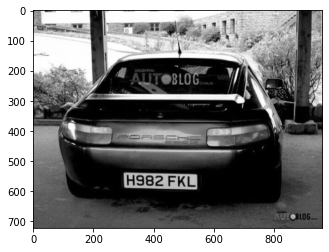

In [55]:
#Storing image in img
img = cv2.imread('../Images/image4.jpg')
#converting image into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

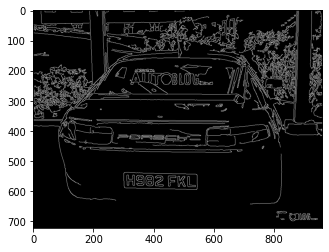

In [56]:
#applying filter to remove noise.
bfilter = cv2.bilateralFilter(gray,17,17,17)
#applying the edge setection by using canny.
#Here 150 is taken as lower thresold value and 200 is taken as upper thresold value
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [57]:
#finding the contor
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
#sorting contor on the basis of area
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [58]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour ,10, True)
     #here the contour is calculated if the length is equal to 4
    if len(approx) == 4:
        location = approx
        break
print(location)       
        

[[[300 540]]

 [[306 589]]

 [[543 592]]

 [[538 543]]]


In [59]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)

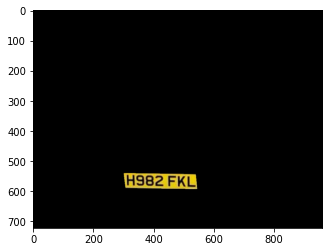

In [60]:
#imshow is method used to show image in windows
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [61]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

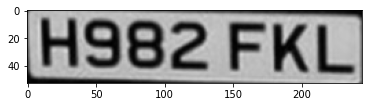

In [62]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [64]:
#charater reading from the image using python library easyocr 
reader = easyocr.Reader(['en']) 
text=reader.readtext(cropped_image)
print(text)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9769778047590311)]


c:\users\manish\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [65]:
str_value=''
for x in text:
    str_value+=x[1]+" "
str_value.strip()



'H982 FKL'

In [66]:
f=open("../Plate_numbers/Plate_number.txt","w")
if(len(str_value)==14):
    plate_number=str_value[0:2]+str_value[3:5]+str_value[6:8]+str_value[9:13]
    print("The plate number is:"+ plate_number)
    f.write(plate_number)
    f.close()
else:
    print("Undefined Number:"+str_value)

Undefined Number:H982 FKL 
